In [1]:
import os
from abcli import file
from openai_cli import NAME, VERSION
from openai_cli.completion.functions import complete_prompt
from openai_cli.completion.classes import ai_function
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.88.1.


In [2]:
input_image = file.load_image(
    os.path.join(
        os.getenv("HOME",""),
        "git/blue-bracket/images/portal-34.jpg")
        )[1]

In [3]:
func = ai_function(
    inputs = ["an image as a numpy array"],
    returns = ["a darker version of the input image as a numpy array"],
    requirements = [
        "does not run a for loop on the pixels",
        "uses numpy vector functions",
        "imports all modules that are used in the code"
    ],
    output_class_name="ndarray",
    verbose=False,
)

ai_function.prompt=Write a python function named ai_function_25818808
that inputs an image as a numpy array
and does not run a for loop on the pixels and
uses numpy vector functions and
imports all modules that are used in the code
and returns a darker version of the input image as a numpy array.


In [4]:
assert func.generate(validation_input = input_image)

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=4364 request_id=9d5b15ed525bbf281e3b7716332a5801 response_code=200
openai-cli.complete(): finish_reason: stop.
code: 

def ai_function_25818808(img):
    import numpy as np
    import cv2
 
    # Convert to float32 to enable pointwise operations
    img = np.float32(img)
 
    # Modify the pixel values by scaling by a factor of 0.8
    img = img * 0.8
 
    # Convert float32 to uint8 in order to return an image
    return np.uint8(img)
func_ai.compute(ndarray)
-> ndarray


In [5]:

image_output = func.compute(input_image)
assert image_output is not None

func_ai.compute(ndarray)
-> ndarray


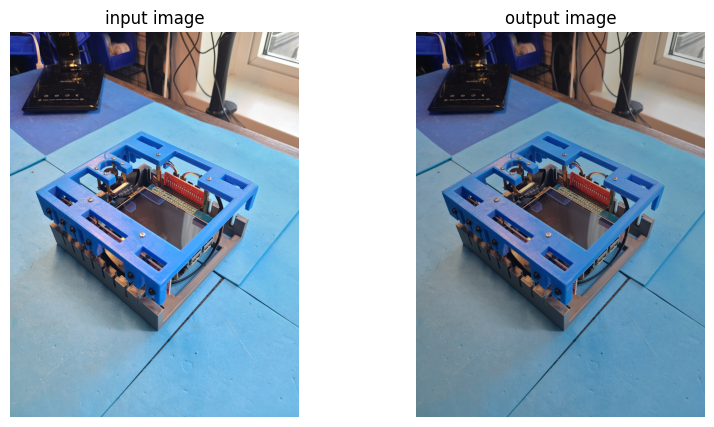

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [7]:
# END